# Дождливо ли в Сиэтле? (1948-2017)
Светчикова Дарья, ММР211

Помимо кофе, гранжа и технологических компаний Сиэтл известен тем, что тут часто идет дождь. Этот датасет содержит полные записи о дневном графике осадков *с 1 января 1948 года по 12 декабря 2017 года*.

**Основные вопосы**: 
- Как часто идет дождь и сколько осадков выпадает?
- Можно ли  использовать этот набор данных чтобы узнать, будет ли дождь в определенный день, учитывая информацию о предыдущих днях?
- Можно ли определить изменения количества осадков с течением времени? Есть ли сезонность?

DATE = дата наблюдения
PRCP = количество осадков в дюймах
TMAX = максимальная температура в этот день, в градусах по Фаренгейту
TMIN = минимальная температура в этот день, в градусах по Фаренгейту
RAIN = TRUE, если в этот день наблюдался дождь, FALSE, если его не было

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dpi_value = 120

In [2]:
#создаем датафрейм под именем weather, отмечаем размеры массива - 25551 строчек и 5 колонок
weather = pd.read_csv('seattleWeather_1948-2017.csv') 
weather

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [3]:
#изменим названия колонки PRCP на Rainfall - количество осадков, а также корректируем названия DATE и RAIN
weather.rename(columns = {'PRCP': 'Rainfall', 'DATE': 'Date', 'RAIN': 'Rain'}, inplace = True)
weather

,Date,Rainfall,TMAX,TMIN,Rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [4]:
weather.info() # вызов этого метода дает понять, что в столбцах Rainfall и Rain есть пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      25551 non-null  object 
 1   Rainfall  25548 non-null  float64
 2   TMAX      25551 non-null  int64  
 3   TMIN      25551 non-null  int64  
 4   Rain      25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
weather[weather.Rainfall.isnull()] #отсутствующие значения не выглядят значимымы, их всего 3, поэтому оставим их в покое до тех пор, пока они не создадут проблемы

,Date,Rainfall,TMAX,TMIN,Rain
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


**Произведем некоторые конвертации для удобства воспринятия информации.** 

Так как в России мы используем для измерения температур градусы Цельсия и измеряем осадки в мм, произведем конвертацию в них.

In [6]:
def ConvertItoM(I):
    #Преобразование Дюймов в миллиметры с помощью функции
    M = I * 25.40000
    #Возвращаем значение конверсии возвращение M
    return M

weather['Rainfall'].apply(ConvertItoM) #назначаем функции обратиться к столбцу Rainfall - кол-во осадков в дюймах

0        11.938
1        14.986
2        10.668
3         7.874
4         4.318
          ...  
25546     0.000
25547     0.000
25548     0.000
25549     0.000
25550     0.000
Name: Rainfall, Length: 25551, dtype: float64

In [7]:
weather['Rainfall'] = weather['Rainfall'].apply(ConvertItoM).round(0) #округлим значение 
weather

,Date,Rainfall,TMAX,TMIN,Rain
0,1948-01-01,12.0,51,42,True
1,1948-01-02,15.0,45,36,True
2,1948-01-03,11.0,45,35,True
3,1948-01-04,8.0,45,34,True
4,1948-01-05,4.0,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False


In [8]:
def ConvertFtoC1(F):
    #Преобразование Фаренгейта в Цельсий с помощью функции
    C =(5 / 9) * (F - 32)
    #Возвращаем значение конверсии возвращение C
    return C

In [9]:
weather['TMAX'] = weather['TMAX'].apply(ConvertFtoC1).round(0) #округлим значение температур
weather

,Date,Rainfall,TMAX,TMIN,Rain
0,1948-01-01,12.0,11.0,42,True
1,1948-01-02,15.0,7.0,36,True
2,1948-01-03,11.0,7.0,35,True
3,1948-01-04,8.0,7.0,34,True
4,1948-01-05,4.0,7.0,32,True
...,...,...,...,...,...
25546,2017-12-10,0.0,9.0,34,False
25547,2017-12-11,0.0,9.0,29,False
25548,2017-12-12,0.0,8.0,32,False
25549,2017-12-13,0.0,9.0,34,False


In [10]:
def ConvertFtoC2(F):
    #Преобразование Фаренгейта в Цельсий с помощью функции
    C =(5 / 9) * (F - 32)
    #Возвращаем значение конверсии возвращение C
    return C

In [11]:
weather['TMIN'].apply(ConvertFtoC2)#назначаем функции обратиться к столбцу TMIN - минимальная температура

0        5.555556
1        2.222222
2        1.666667
3        1.111111
4        0.000000
           ...   
25546    1.111111
25547   -1.666667
25548    0.000000
25549    1.111111
25550    2.222222
Name: TMIN, Length: 25551, dtype: float64

In [12]:
weather['TMIN'] = weather['TMIN'].apply(ConvertFtoC2).round(0) #округлим значение температур
weather

,Date,Rainfall,TMAX,TMIN,Rain
0,1948-01-01,12.0,11.0,6.0,True
1,1948-01-02,15.0,7.0,2.0,True
2,1948-01-03,11.0,7.0,2.0,True
3,1948-01-04,8.0,7.0,1.0,True
4,1948-01-05,4.0,7.0,0.0,True
...,...,...,...,...,...
25546,2017-12-10,0.0,9.0,1.0,False
25547,2017-12-11,0.0,9.0,-2.0,False
25548,2017-12-12,0.0,8.0,0.0,False
25549,2017-12-13,0.0,9.0,1.0,False


In [13]:
weather['TMAX'].mean() #вычислим среднее арифметического значение максимальной температуры

15.303941137333176

In [14]:
weather['TMIN'].mean() #вычислим среднее арифметического значение минимальной температуры

6.955109389065007

In [15]:
# создаем функцию и назначаем temp следующие значения
def get_temp_cat(temp):
    if temp < 0:
        return 'Freezing'
    elif temp < 15:
        return 'Chilly'
    elif temp < 26:
        return 'Nice'
    elif temp <= 26:
        return 'Hot'
    else:
        return temp

In [16]:
weather['TMIN'].apply(get_temp_cat) #назначаем функции обратиться к столбцу Температура min и max
weather['TCat'] = weather['TMIN'].apply(get_temp_cat) #создаем новую колонку
weather

,Date,Rainfall,TMAX,TMIN,Rain,TCat
0,1948-01-01,12.0,11.0,6.0,True,Chilly
1,1948-01-02,15.0,7.0,2.0,True,Chilly
2,1948-01-03,11.0,7.0,2.0,True,Chilly
3,1948-01-04,8.0,7.0,1.0,True,Chilly
4,1948-01-05,4.0,7.0,0.0,True,Chilly
...,...,...,...,...,...,...
25546,2017-12-10,0.0,9.0,1.0,False,Chilly
25547,2017-12-11,0.0,9.0,-2.0,False,Freezing
25548,2017-12-12,0.0,8.0,0.0,False,Chilly
25549,2017-12-13,0.0,9.0,1.0,False,Chilly


In [17]:
weather.groupby('TCat').count() #при подсчете количества записей со значениями TCat мы увидели, что в Сиэтле нет погоды Hot

,Date,Rainfall,TMAX,TMIN,Rain
TCat,,,,,
Chilly,22895,22892,22895,22895,22892
Freezing,1803,1803,1803,1803,1803
Nice,853,853,853,853,853


In [18]:
#Определим среднее значение температуры за 1 день
weather['Temp'] = weather['TMAX'] + weather['TMIN'] / 2
weather.head()

,Date,Rainfall,TMAX,TMIN,Rain,TCat,Temp
0,1948-01-01,12.0,11.0,6.0,True,Chilly,14.0
1,1948-01-02,15.0,7.0,2.0,True,Chilly,8.0
2,1948-01-03,11.0,7.0,2.0,True,Chilly,8.0
3,1948-01-04,8.0,7.0,1.0,True,Chilly,7.5
4,1948-01-05,4.0,7.0,0.0,True,Chilly,7.0


In [19]:
weather['Rain'].value_counts() # этот метод вызывает частотную таблицу со значениями дождя

False    14648
True     10900
Name: Rain, dtype: int64

In [20]:
weather['Rain'].value_counts(dropna = False) #определяем пропущенные строки

False    14648
True     10900
NaN          3
Name: Rain, dtype: int64

<AxesSubplot:>

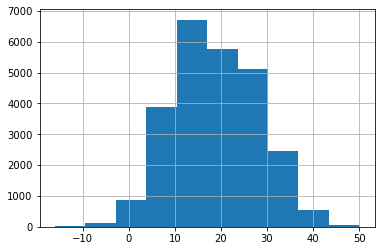

In [21]:
weather['Temp'].hist() #вызов построения гистрограммы на колонку Температура

In [22]:
weather[['TMAX', 'TMIN']].describe() #вызов функции описания дата фрейма: минимальное значение, разброс, максимальное значение и персентиля, где 50% это медиана

,TMAX,TMIN
count,25551.000000,25551.000000
mean,15.303941,6.955109
std,7.100838,4.945106
min,-16.000000,-18.000000
25%,10.000000,3.000000
50%,14.000000,7.000000
75%,21.000000,11.000000
max,39.000000,22.000000


Произведем конвертацию столбца **Дата** в объект дата и время, для удобства анализа. 

In [23]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['day'] = [d.day for d in weather.Date]
weather['month'] = [d.month for d in weather.Date]
weather['year'] = [d.year for d in weather.Date]
weather = weather[['Date', 'year', 'month', 'day', 'Rainfall', 'TMAX', 'TMIN', 'Rain']]
weather.head()

,Date,year,month,day,Rainfall,TMAX,TMIN,Rain
0,1948-01-01,1948,1,1,12.0,11.0,6.0,True
1,1948-01-02,1948,1,2,15.0,7.0,2.0,True
2,1948-01-03,1948,1,3,11.0,7.0,2.0,True
3,1948-01-04,1948,1,4,8.0,7.0,1.0,True
4,1948-01-05,1948,1,5,4.0,7.0,0.0,True


**Визуализация**

In [24]:
#для построения визуализации данных создадим функцию visualize
def visualize(data, title, xlabel, ylabel,
              percent_y_ticks=False, legend_values=None,
              mean_value=None, mean_line_color=None,
              plot_type='pandas', seaborn_plot_type=None, 
              seaborn_legend=None, save_plot=False, 
              save_path=None, dpi=None, **kwargs):
    
    if plot_type == 'pandas':
        plot = data.plot(**kwargs)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        if mean_value is not None:
            plt.axhline(y=mean_value, xmin=-1, xmax=1, color=mean_line_color, linestyle='--', lw=2)
        if percent_y_ticks:
            vals = plot.get_yticks()
            plot.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
        if legend_values is not None:
            plt.legend(legend_values)
        if save_plot:
            fig = plot.get_figure()
            fig.savefig(save_path, dpi=dpi_value)
    return plot

In [25]:
seattle_colors = ['#E9967A', '#4682B4']

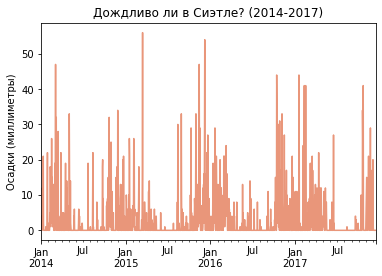

In [26]:
#сосредоточимся на последних нескольких годах, чтобы легче отследить закономерность
plot_data = weather[weather['year'] >= 2014]
visualize(plot_data,
          title='Дождливо ли в Сиэтле? (2014-2017)',
          xlabel=None,
          ylabel='Осадки (миллиметры)',
          legend_values=None,
          plot_type='pandas',
          save_plot=True,
          save_path='output.png',
          dpi=dpi_value,
          x='Date',
          y='Rainfall',
          color=seattle_colors[0],
          legend=False);

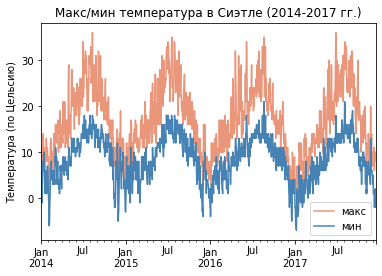

In [27]:
visualize(plot_data,
          title='Макс/мин температура в Сиэтле (2014-2017 гг.)',
          xlabel=None,
          ylabel='Температура (по Цельсию)',
          legend_values=['макс', 'мин'],
          plot_type='pandas',
          save_plot=True,
          save_path='output2.png',
          dpi=dpi_value,
          x='Date',
          y=['TMAX', 'TMIN'],
          color=seattle_colors,
          legend=False);

**Как часто идет дождь в Сиэтле?**

In [28]:
proportion_df = pd.DataFrame(weather['Rain'].value_counts() / weather.shape[0]).reset_index()
proportion_df = proportion_df.rename(columns={'index': 'Rain', 'Rain': 'proportion'})
proportion_df['Rain'] = np.where(proportion_df['Rain'], 'Rain', 'No Rain')

In [29]:
proportion_df 

,Rain,proportion
0,No Rain,0.573285
1,Rain,0.426598


/var/folders/28/dzgl64j14218k8896tppzx840000gn/T/ipykernel_70573/2033314892.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


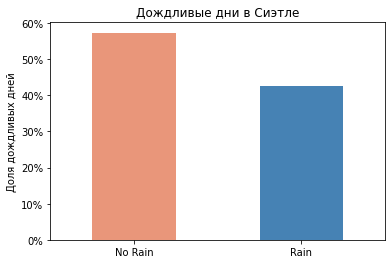

In [30]:
visualize(proportion_df,
          title='Дождливые дни в Сиэтле',
          xlabel=None,
          ylabel='Доля дождливых дней',
          legend_values=None,
          plot_type='pandas',
          save_plot=True,
          save_path='output3.png',
          dpi=dpi_value,
          x='Rain', 
          y='proportion',
          percent_y_ticks=True,
          kind='bar',
          rot=0,
          color=seattle_colors,
          legend=False);

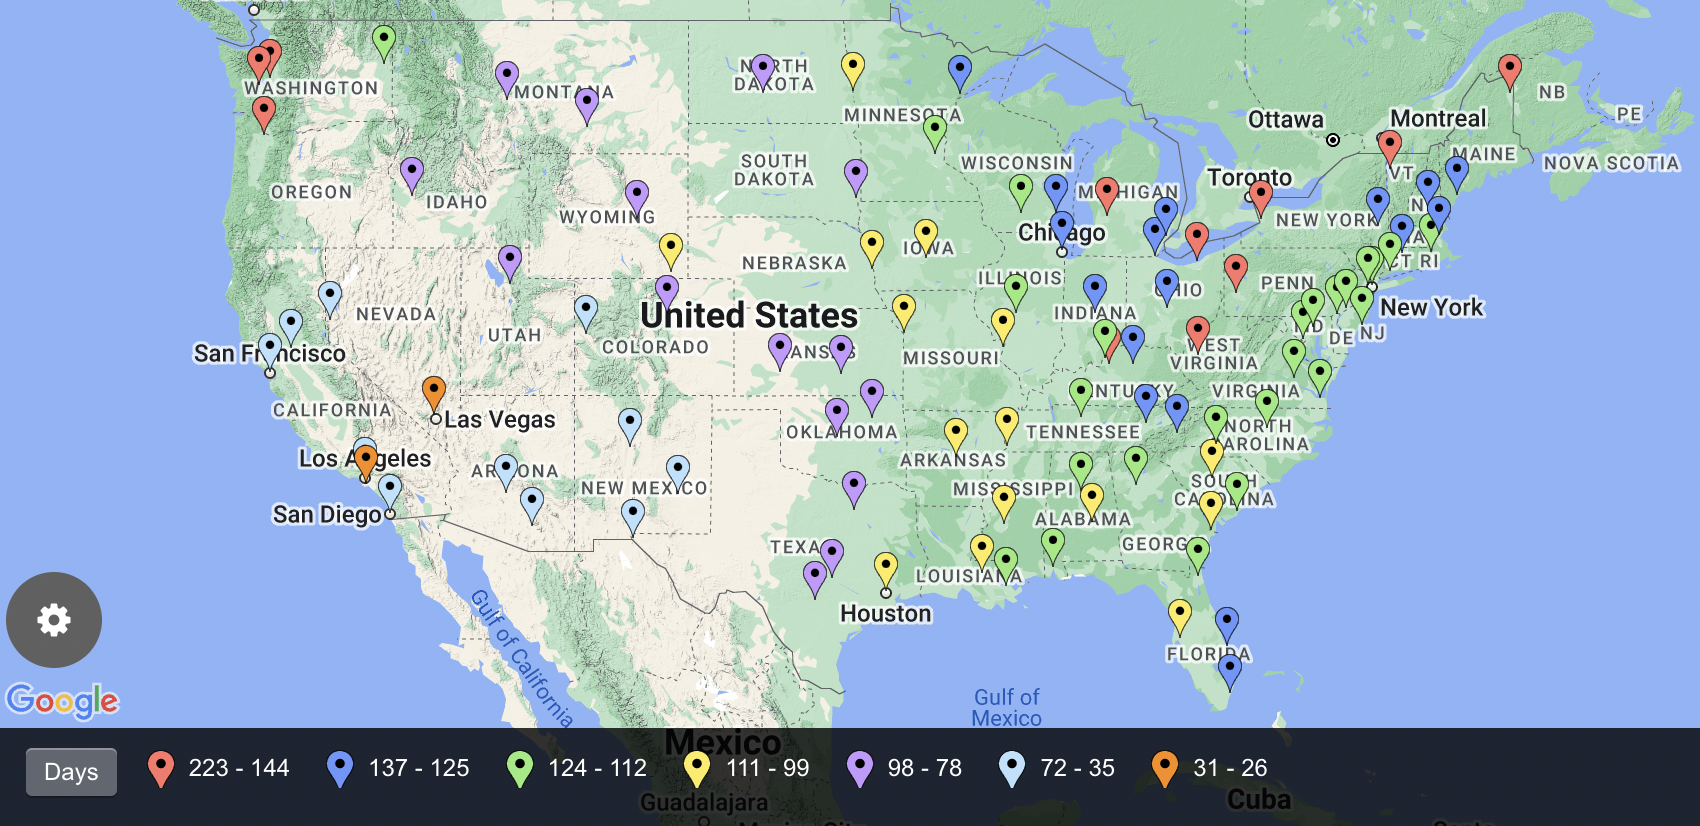

In [31]:
from IPython.display import Image
Image('number_of_rain.png')
#на карте отмечено количество дождливых дней, что соответствует нашему анализу

**Вывод:** С 1948 по 2017 год в Сиэтле шел дождь 43% времени. Это примерно 157 дней.

**Меняются ли данные о количестве дождливых дней в зависимости от года или от месяца?**

In [32]:
rain_by_year_df = weather[['year', 'Rain']].groupby(['year', 'Rain']).size().unstack(fill_value=0).reset_index()
rain_by_year_df = rain_by_year_df.assign(total=rain_by_year_df[False] + rain_by_year_df[True])
rain_by_year_df = rain_by_year_df.assign(rain_proportion = rain_by_year_df[True] / rain_by_year_df.total).drop([False, True, 'total'], axis=1).set_index('year')
rain_by_year_mean = rain_by_year_df.rain_proportion.mean()
rain_by_year_df.head()

Rain,rain_proportion
year,
1948,0.483607
1949,0.380822
1950,0.531507
1951,0.410959
1952,0.379781


In [33]:
#создадим функцию, которая поможет преобразовать данные по месяцам
def convert_month(month):
    months_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 
                   4: 'Apr', 5: 'May', 6: 'Jun',
                   7: 'Jul', 8: 'Aug', 9: 'Sep',
                   10: 'Oct', 11: 'Nov', 12: 'Dec'}
    
    return months_dict[month]

In [34]:
rain_by_month_prop = weather[['month', 'Rain']].groupby(['month', 'Rain']).size().unstack(fill_value=0).reset_index()
rain_by_month_prop = rain_by_month_prop.assign(total = rain_by_month_prop[False] + rain_by_month_prop[True])
rain_by_month_prop = rain_by_month_prop.assign(rain_proportion = rain_by_month_prop[True] / rain_by_month_prop.total)
rain_by_month_prop = rain_by_month_prop.drop([True, False, 'total'], axis=1)
rain_by_month_prop.set_index(rain_by_month_prop.month.apply(convert_month), inplace=True)
rain_by_month_prop.drop('month', axis=1, inplace=True)

In [35]:
rain_by_month_prop

Rain,rain_proportion
month,
Jan,0.598157
Feb,0.557634
Mar,0.558525
Apr,0.475238
May,0.355300
Jun,0.301239
Jul,0.158065
Aug,0.190323
Sep,0.290138


/var/folders/28/dzgl64j14218k8896tppzx840000gn/T/ipykernel_70573/2033314892.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


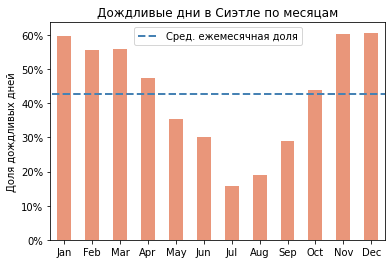

In [36]:
visualize(rain_by_month_prop,
          title='Дождливые дни в Сиэтле по месяцам',
          xlabel=None,
          ylabel='Доля дождливых дней',
          legend_values=['Сред. ежемесячная доля'],  
          mean_value=rain_by_month_prop.rain_proportion.mean(),
          mean_line_color=seattle_colors[1],
          plot_type='pandas',
          save_plot=True,
          save_path='output5.png',
          dpi=dpi_value,
          percent_y_ticks=True,
          kind='bar',
          rot=0,
          color=seattle_colors[0],
          legend=False);

**Вывод:** В среднем ежегодно количество осадков не отличается. Максимальное количество дождливых дней приходится на зиму. Меньше всего дождливых дней бывает летом и осенью. 

**Проанализируем количество осадков в Сиэтле**

In [37]:
monthly_mean = weather[['month', 'Rainfall', 'TMAX', 'TMIN']].groupby(['month']).mean().reset_index()
monthly_mean.set_index(monthly_mean.month.apply(convert_month), inplace=True)
monthly_mean.drop('month', axis=1, inplace=True)
monthly_mean

,Rainfall,TMAX,TMIN
month,,,
Jan,4.675115,7.301382,1.802765
Feb,3.646107,9.434277,2.659252
Mar,3.272350,11.293548,3.556221
Apr,2.270476,14.178571,5.251429
May,1.504608,17.960369,8.180184
Jun,1.253575,20.922381,10.922857
Jul,0.590783,24.161751,12.784332
Aug,0.894931,24.014747,12.946083
Sep,1.515007,20.904286,10.974286


**Вывод:** Большее количество осадков выпадает зимой, а наименьшее количество осадков выпадает летом.

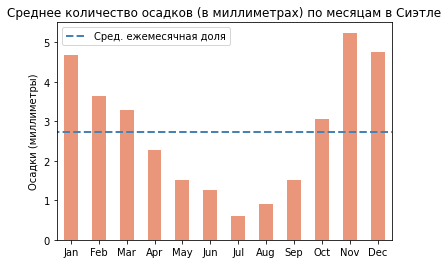

In [38]:
visualize(monthly_mean[['Rainfall']],
          title='Среднее количество осадков (в миллиметрах) по месяцам в Сиэтле',
          xlabel=None,
          ylabel='Осадки (миллиметры)',
          legend_values=['Сред. ежемесячная доля'],  
          mean_value=monthly_mean.Rainfall.mean(),
          mean_line_color=seattle_colors[1],
          plot_type='pandas',
          save_plot=True,
          save_path='output6.png',
          dpi=dpi_value,
          kind='bar',
          rot=0,
          color=seattle_colors[0],
          legend=False);

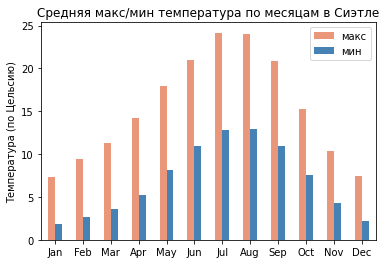

In [39]:
visualize(monthly_mean[['TMAX', 'TMIN']],
          title='Средняя макс/мин температура по месяцам в Сиэтле',
          xlabel=None,
          ylabel='Температура (по Цельсию)',
          legend_values=['макс', 'мин'],  
          plot_type='pandas',
          save_plot=True,
          save_path='output7.png',
          dpi=dpi_value,
          kind='bar',
          rot=0,
          color=seattle_colors,
          legend=False);

In [40]:
temp_ranges = monthly_mean.TMAX - monthly_mean.TMIN
temp_ranges.index = monthly_mean.index #посмотрим есть ли разница меджду макс и мин температурами в отношении месяца

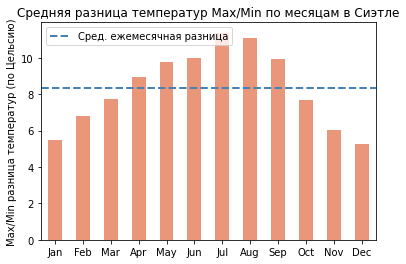

In [41]:
plot_data = monthly_mean[['TMAX', 'TMIN']].assign(max_min_gap = temp_ranges)['max_min_gap']

visualize(plot_data,
          title='Средняя разница температур Max/Min по месяцам в Сиэтле',
          xlabel=None,
          ylabel='Max/Min разница температур (по Цельсию)',
          mean_value=temp_ranges.mean(),
          mean_line_color=seattle_colors[1],          
          legend_values=['Сред. ежемесячная разница'],  
          plot_type='pandas',
          save_plot=True,
          save_path='output8.png',
          dpi=dpi_value,
          kind='bar',
          rot=0,
          color=seattle_colors[0],
          legend=False);

**Вывод:** Зимой в Сиэтле самые стабильные температуры, а летом наблюдается большой разрыв между высокими и низкими температурами.

# Что мы узнали?

- За весь период в Сиэтле не бывало выше 26 градусов С
- Лето сухое и теплое
- Зима довольно предсказуемая, так как диапазон высоких/низких температур узкий
- Почти половина дней за все время были дождливые
- Средняя температура в Сиэтле 10-20 С
- Сезонность присутствует: зимой идут постоянные дожди, а летом дожди почти отсутствуют
- Дождливые дни связаны со временем года и температурой и на основе этих данных можно предсказать дождь в Сиэтле